# Linear Regression Lunch & Learn

In [41]:
# Import libraries needed for linear regression computation
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from math import log
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectPercentile
import seaborn as sns
%matplotlib inline

## 1.0 Simple Linear Regression Model

The code blocks below outline the following steps 
- Read-in the predicting_house_prices csv file
- Train a model using one dependent and independent variable
- Evaluate the model via model outputs and residual plots

The dataset used has 79 features of houses such as lotsize, year built and zone location among other features. The purpose is to predict the SALE PRICE of the house given the features.

https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [95]:
#read in the data
filepath = '//Users//joanne//Desktop//predicting_house_prices//data//'
data = pd.read_csv(filepath + 'train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Let's build a simple linear regression model. The following are the model parameters:
- Independent variable: First floor square feet
- Dependent variable: Sale price of the house
- The data is split into training and testing sets

Below is a scatter plot of 1stFloorSF vs SalePrice:

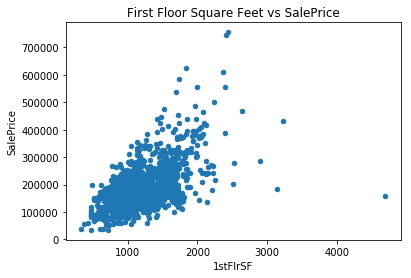

In [96]:
firstfloorsqft_vs_SalePrice = data.plot(kind="scatter", x='1stFlrSF', y='SalePrice', 
                                    title = "First Floor Square Feet vs SalePrice")
firstfloorsqft_vs_price.set_xlabel("First Floor SQFT") 
firstfloorsqft_vs_price.set_ylabel("SalePrice") 
plt.show()

In [97]:
train_X, test_X, train_y, test_y = train_test_split(
    data['1stFlrSF'], data['SalePrice'], test_size=0.2, random_state=43344)

model = sm.OLS(train_y, sm.add_constant(all_train_X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                 1.050e+04
Date:                Thu, 02 Aug 2018   Prob (F-statistic):               0.00
Time:                        19:29:20   Log-Likelihood:                -14556.
No. Observations:                1168   AIC:                         2.911e+04
Df Residuals:                    1167   BIC:                         2.912e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1stFlrSF     153.6111      1.499    102.486      0.000     150.670     156.552
==============================================================================
Omnibus:                      234.988   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              959.917
Skew:                           0.903   Prob(JB):                    3.60e-209
Kurtosis:                       7.057   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

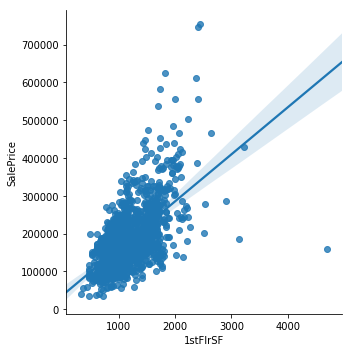

In [98]:
# Plot with linear regression equation
sns.lmplot(x='1stFlrSF',y='SalePrice',data=data, fit_reg=True) 

Let's view the evaluation metrics of the training and testing sets:
- Root mean squared error
- Average percent error
- Analyzing the residual plot

In [104]:
# Let's get the train and test RMSE to compare
train_predictions = model.predict(train_X)
print('The training RMSE is ', sqrt(mean_squared_error(train_y, train_predictions)), '!')
avg_train_err = ((abs(train_y - train_predictions))/train_y)
print('Training average percent error is', round(avg_train_err.mean()*100,2), '%.')
print('')

test_predictions = model.predict(test_X)
print('The testing RMSE is ', sqrt(mean_squared_error(test_y, test_predictions)), '!')

avg_test_err = ((abs(test_y - test_predictions))/test_y)
print('Training average percent error is',round(avg_test_err.mean()*100,2), '%.')

The training RMSE is  62540.14849953761 !
Training average percent error is 27.33 %.

The testing RMSE is  70526.81030305706 !
Training average percent error is 26.98 %.


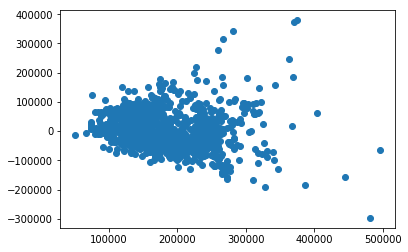

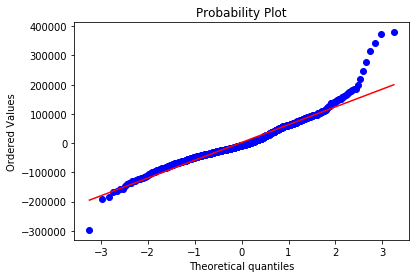

In [105]:
model_fitted = pd.DataFrame(model.fittedvalues)
model_residuals = pd.DataFrame(model.resid)

residual_plot = plt.scatter(model_fitted , model_residuals)
plt.show()

import pylab
import scipy.stats as stats
stats.probplot(model_residuals[0], dist='norm', plot=pylab)
pylab.show()

## 2.0 Multi-Linear Regression Model (All Features)

The code blocks below outline the following steps 
- Read-in the predicting_house_prices csv file
- Remove numeric columns that are sparse
- Apply one-hot encoding to all categorical variables 
- Train a model using all features in the dataset (except a few)
- Evaluate the model via model outputs and residual plots

Take note of the difference in the evaluation criteria between modeling with one vs all features!

In [118]:
# Build a regression model with all features
sale_price = data['SalePrice']
features = data.drop(columns=['Id', 'SalePrice', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt'])

# Replace any null values in categorical variables with 'Not Available'
for i in features.columns:
    if features[i].dtypes == 'object':
        features[i] = features[i].fillna('Not Available')

In [119]:
# onehotencode the categorical variables
print(features.shape)
features = pd.get_dummies(features, drop_first=True)
print(features.shape)

(1460, 76)
(1460, 258)


Notice how the R_squared increased! As explanatory variates are added R_squared will either stay the same or increase. This is because, each features explains some variation in the model.

In [120]:
# Split into training and test sets & fit the model
all_train_X, all_test_X, train_y, test_y = train_test_split(
    features, sale_price, test_size=0.2, random_state=43344)

model_all_features = sm.OLS(train_y, sm.add_constant(all_train_X)).fit()
model_all_features.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     55.29
Date:                Thu, 02 Aug 2018   Prob (F-statistic):               0.00
Time:                        19:41:13   Log-Likelihood:                -13248.
No. Observations:                1168   AIC:                         2.699e+04
Df Residuals:                     923   BIC:                         2.823e+04
Df Model:                         244                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
MSSubClass                   -68.5741     95.442     -0.718      0.473    -255.883     118.735
LotArea                        0.6802      0.139      4.898      0.000       0.408       0.953
OverallQual                 7519.9556   1167.880      6.439      0.000    5227.947    9811.964
OverallCond                 5325.8152    998.628      5.333      0.000    3365.971    7285.659
YearBuilt                    319.2074     86.237      3.702      0.000     149.964     488.451
YearRemodAdd                 118.0040     63.911      1.846      0.065      -7.423     243.431
BsmtFinSF1                    17.5937      3.237      5.435      0.000      11.241      23.947
BsmtFinSF2                    11.6232      6.557      1.773      0.077      -1.245      24.492
BsmtUnfSF                     -3.4709      3.134     -1.108      0.268      -9.620       2.679
TotalBsmtSF                   25.7459      4.697      5.481      0.000      16.527      34.965
1stFlrSF                      21.1386      7.372      2.867      0.004       6.670      35.607
2ndFlrSF                      43.2795      6.334      6.833      0.000      30.849      55.710
LowQualFinSF                 -38.3092     16.115     -2.377      0.018     -69.935      -6.683
GrLivArea                     26.1087      6.559      3.981      0.000      13.236      38.981
BsmtFullBath                -789.5527   2340.988     -0.337      0.736   -5383.829    3804.724
BsmtHalfBath                1871.4023   3802.353      0.492      0.623   -5590.858    9333.663
FullBath                    1255.9279   2606.004      0.482      0.630   -3858.453    6370.308
HalfBath                    1274.9589   2474.604      0.515      0.607   -3581.545    6131.463
BedroomAbvGr               -4210.2137   1562.064     -2.695      0.007   -7275.822   -1144.605
KitchenAbvGr               -8619.8157   6777.767     -1.272      0.204   -2.19e+04    4681.806
TotRmsAbvGrd                1098.7678   1096.341      1.002      0.317   -1052.842    3250.377
Fireplaces                  7239.6905   3089.950      2.343      0.019    1175.547    1.33e+04
GarageCars                  5449.0869   2802.582      1.944      0.052     -51.086    1.09e+04
GarageArea                    16.4576      8.971      1.835      0.067      -1.148      34.064
WoodDeckSF                    13.4228      6.907      1.943      0.052      -0.132      26.978
OpenPorchSF                   -7.0106     13.335     -0.526      0.599     -33.181      19.160
EnclosedPorch                 -3.4488     14.441     -0.239      0.811     -31.791      24.893
3SsnPorch                     30.7181     24.681      1.245      0.214     -17.720      79.156
ScreenPorch                   29.8539     14.254      2.094      0.036       1.881      57.827
PoolArea                     664.1876    23

Notice that the training and testing evaluation metrics have significantly decreased! However, the model is now overfitting the training set :(

In [121]:
# Let's get the train and test RMSE to compare
train_predictions = model_all_features.predict(all_train_X)
# print('The training RMSE is ', sqrt(mean_squared_error(train_y, train_predictions)), '!')
avg_train_err = ((abs(train_y - train_predictions))/train_y)
print('Training average percent error is', round(avg_train_err.mean()*100,2), '%.')


test_predictions = model_all_features.predict(all_test_X)
# print('The testing RMSE is ', sqrt(mean_squared_error(test_y, test_predictions)), '!')

avg_test_err = ((abs(test_y - test_predictions))/test_y)
print('Training average percent error is',round(avg_test_err.mean()*100,2), '%.')

Training average percent error is 7.77 %.
Training average percent error is 12.98 %.


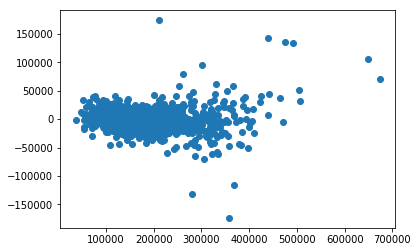

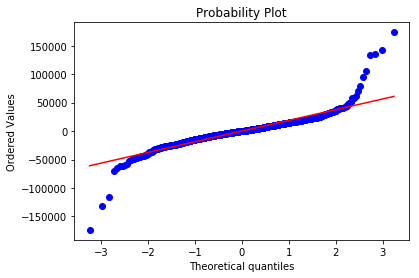

In [122]:
# Plot the residual plot along with the QQ-Plot

# fitted values
model_all_features_fitted = pd.DataFrame(model_all_features.fittedvalues)

# model residuals
model_all_features_residuals = pd.DataFrame(model_all_features.resid)

# Residual plot
residual_plot = plt.scatter(model_all_features_fitted , model_all_features_residuals)
plt.show()

#QQ-plot
stats.probplot(model_all_features_residuals[0], dist='norm', plot=pylab)
pylab.show()

## 3.0 Multi-Linear Regression Model (Percentile of Features)

The model above is overfitting the training data. To avoid overfitting, let's use a select number of features. The SelectPercentile function is used in this case.

The code blocks below outline the following steps 
- Read-in the predicting_house_prices csv file
- Remove numeric columns that are sparse
- Apply one-hot encoding to all categorical variables 
- Select 6.5 percentile of features (choosen by trail & error)
- Train a model using selected features
- Evaluate the model via model outputs and residual plots

Note the similarities between model in 3.0 and 2.0. Model 2.0 uses 258 features whereas model 3.0 uses 17 features.

In [123]:
# Build a regression model with all features
sale_price = data['SalePrice']
features = data.drop(columns=['Id', 'SalePrice', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt'])

# Replace any null values in categorical variables with 'Not Available'
for i in features.columns:
    if features[i].dtypes == 'object':
        features[i] = features[i].fillna('Not Available')
        
# onehotencode the categorical variables
print(features.shape)
features = pd.get_dummies(features, drop_first=True)
print(features.shape)

(1460, 76)
(1460, 258)


In [124]:
# Use the SelectPercentile function to automatically select a percentile of the dataset
percentile_select = SelectPercentile(score_func=chi2, percentile=6.5)
percentile_fit = percentile_select.fit(features, sale_price)
percentile_features_cols = features[features.columns[percentile_fit.get_support(indices=True)]].columns

percentile_features = features[percentile_features_cols]
print(percentile_features_cols.shape)
print(percentile_features_cols)

(17,)
Index(['LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')


Got a higher R_squared! Picked most significant features.

In [127]:
# Build a model with all features to simply predict sales price
train_X, test_X, train_y, test_y = train_test_split(
    percentile_features, sale_price, test_size=0.2, random_state=43344)

model_percentile_features = sm.OLS(train_y, sm.add_constant(train_X)).fit()
model_percentile_features.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     1713.
Date:                Thu, 02 Aug 2018   Prob (F-statistic):               0.00
Time:                        19:47:52   Log-Likelihood:                -14063.
No. Observations:                1168   AIC:                         2.816e+04
Df Residuals:                    1153   BIC:                         2.823e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
LotArea           0.2105      0.132      1.593      0.111      -0.049       0.470
BsmtFinSF1       36.1537      2.884     12.537      0.000      30.496      41.812
BsmtFinSF2       -3.8158      5.524     -0.691      0.490     -14.653       7.022
BsmtUnfSF        12.0513      2.693      4.475      0.000       6.767      17.336
TotalBsmtSF      44.3893      4.084     10.869      0.000      36.377      52.402
1stFlrSF         28.6006      7.514      3.806      0.000      13.857      43.344
2ndFlrSF         55.3283      6.881      8.041      0.000      41.828      68.828
LowQualFinSF    -71.0303     19.069     -3.725      0.000    -108.445     -33.616
GrLivArea        12.8986      6.299      2.048      0.041       0.540      25.258
GarageArea       77.6305      6.856     11.323      0.000      64.179      91.082
WoodDeckSF       36.5055     10.450      3.493      0.000      16.003      57.008
OpenPorchSF      28.8579     19.391      1.488      0.137      -9.187      66.903
EnclosedPorch   -98.3906     20.594     -4.778      0.000    -138.797     -57.985
3SsnPorch        30.9258     38.641      0.800      0.424     -44.889     106.740
ScreenPorch      16.5984     21.900      0.758      0.449     -26.370      59.567
PoolArea         78.4956     28.744      2.731      0.006      22.100     134.891
MiscVal          -2.0816      2.235     -0.931      0.352      -6.467       2.304
==============================================================================
Omnibus:                      271.905   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6912.411
Skew:                           0.442   Prob(JB):                         0.00
Kurtosis:                      14.885   Cond. No.                     1.18e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.75e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Percent error lower than model 1.0 but higher than model 2.0. However, model 3.0 no longer overfits the training data!

In [128]:
# Let's get the train and test RMSE to compare
train_predictions = model_percentile_features.predict(train_X)
# print('The training RMSE is ', sqrt(mean_squared_error(train_y, train_predictions)), '!')
avg_train_err = ((abs(train_y - train_predictions))/train_y)
print('Training average percent error is', round(avg_train_err.mean()*100,2), '%.')


test_predictions = model_percentile_features.predict(test_X)
# print('The testing RMSE is ', sqrt(mean_squared_error(test_y, test_predictions)), '!')

avg_test_err = ((abs(test_y - test_predictions))/test_y)
print('Training average percent error is',round(avg_test_err.mean()*100,2), '%.')

Training average percent error is 16.63 %.
Training average percent error is 17.95 %.


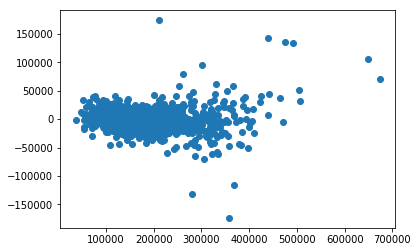

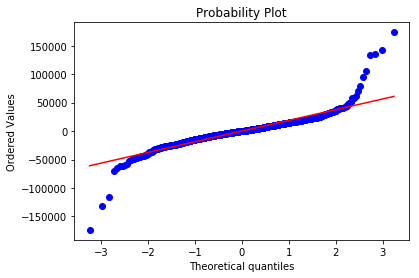

In [130]:
# Plot the residual plot along with the QQ-Plot

# fitted values
model_percentile_features_fitted = pd.DataFrame(model_all_features.fittedvalues)

# model residuals
model_percentile_features_residuals = pd.DataFrame(model_all_features.resid)

# Residual plot
residual_plot = plt.scatter(model_percentile_features_fitted , model_percentile_features_residuals)
plt.show()

#QQ-plot
stats.probplot(model_percentile_features_residuals[0], dist='norm', plot=pylab)
pylab.show()

# EDA

In [366]:
#read in the data
filepath = '//Users//joanne//Desktop//predicting_house_prices//data//'
data = pd.read_csv(filepath + 'train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [367]:
# Look into the Lot feilds
print("# of nulls in LotFrontage feild are:",data['LotFrontage'].isnull().sum())
print("# of nulls in LotArea feild are:",data['LotArea'].isnull().sum())

# of nulls in LotFrontage feild are: 259
# of nulls in LotArea feild are: 0


In [368]:
data['TotalLotArea'] = data['LotFrontage'].fillna(0) + data['LotArea']
print("# of nulls in TotalLotArea feild are:",data['TotalLotArea'].isnull().sum())

# of nulls in TotalLotArea feild are: 0


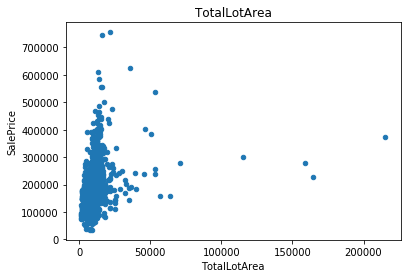

In [369]:
TotalLotArea_vs_SalePrice = data.plot(kind="scatter", x='TotalLotArea', y='SalePrice', 
                                    title = "TotalLotArea")
TotalLotArea_vs_SalePrice.set_xlabel("TotalLotArea") 
TotalLotArea_vs_SalePrice.set_ylabel("SalePrice") 
plt.show()

In [370]:
feature_data = data.drop(columns=['LotFrontage', 'LotArea'])

In [371]:
print(feature_data.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorc

In [372]:
# take a look at all the SF columns
# count of nulls
feature_data[['MasVnrArea', 'TotalBsmtSF', 'GarageArea', 'WoodDeckSF', 
      'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', ]].isnull().sum()

MasVnrArea       8
TotalBsmtSF      0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
dtype: int64

In [373]:
# Make binary variables for the SF features
feature_data['MasVnrArea'] = feature_data['MasVnrArea'].fillna(0)
data['MasVnrArea'] = data['MasVnrArea'].fillna(0)
feature_data['MasVnrAreaBin'] = np.where(feature_data['MasVnrArea'] == 0, 0,1)
feature_data['WoodDeckSFBin'] = np.where(feature_data['WoodDeckSF'] == 0, 0,1)
feature_data['HaveBsmt'] = np.where(feature_data['TotalBsmtSF'] == 0, 0,1)
feature_data['HaveGarage'] = np.where(feature_data['GarageArea'] == 0, 0,1)
feature_data['OpenPorchSFBin'] = np.where(feature_data['OpenPorchSF'] == 0, 0,1)
feature_data['EnclosedPorchBin'] = np.where(feature_data['EnclosedPorch'] == 0, 0,1)
feature_data['3SsnPorchBin'] = np.where(feature_data['3SsnPorch'] == 0, 0,1)
feature_data['ScreenPorchBin'] = np.where(feature_data['ScreenPorch'] == 0, 0,1)
feature_data['PoolAreaBin'] = np.where(feature_data['PoolArea'] == 0, 0,1)

feature_data[['MasVnrArea', 'MasVnrAreaBin', 'TotalBsmtSF', 'GarageArea', 'WoodDeckSF', 'WoodDeckSFBin', 
              'OpenPorchSF', 'OpenPorchSFBin','EnclosedPorch', 'EnclosedPorchBin', '3SsnPorch', '3SsnPorchBin', 
              'ScreenPorch', 'ScreenPorchBin', 'PoolArea', 'PoolAreaBin']].isnull().sum()

MasVnrArea          0
MasVnrAreaBin       0
TotalBsmtSF         0
GarageArea          0
WoodDeckSF          0
WoodDeckSFBin       0
OpenPorchSF         0
OpenPorchSFBin      0
EnclosedPorch       0
EnclosedPorchBin    0
3SsnPorch           0
3SsnPorchBin        0
ScreenPorch         0
ScreenPorchBin      0
PoolArea            0
PoolAreaBin         0
dtype: int64

In [374]:
# Sum up all the SF features as TotalSFfeatures
feature_data['TotalSFFeatures'] = feature_data['MasVnrArea'] + feature_data['TotalBsmtSF'] 
+ feature_data['GarageArea'] + feature_data['WoodDeckSF'] + feature_data['OpenPorchSF'] + feature_data['EnclosedPorch']
+ feature_data['3SsnPorch'] + feature_data['ScreenPorch'] + feature_data['PoolArea']

0         0
1         0
2         0
3         0
4         0
5       320
6         0
7         0
8         0
9         0
10        0
11        0
12      176
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
       ... 
1430      0
1431      0
1432      0
1433      0
1434      0
1435      0
1436      0
1437    304
1438      0
1439      0
1440      0
1441      0
1442      0
1443     40
1444      0
1445      0
1446      0
1447      0
1448      0
1449      0
1450      0
1451      0
1452      0
1453      0
1454      0
1455      0
1456      0
1457      0
1458      0
1459      0
Length: 1460, dtype: int64

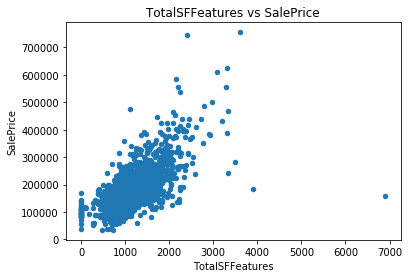

In [375]:
# Plot the TotalSFFeatures to see if it is even correlated!
TotalSFFeatures_vs_SalePrice = feature_data.plot(kind="scatter", x='TotalSFFeatures', y='SalePrice', 
                                    title = "TotalSFFeatures vs SalePrice")
TotalSFFeatures_vs_SalePrice.set_xlabel("TotalSFFeatures") 
TotalSFFeatures_vs_SalePrice.set_ylabel("SalePrice") 
plt.show()

In [376]:
# Test the models wrt each other
model = sm.OLS(feature_data['SalePrice'], sm.add_constant(feature_data[['TotalSFFeatures',
                                                                        'MasVnrAreaBin',
                                                                        'WoodDeckSFBin', 'HaveBsmt'
                                                                       , 'HaveGarage', 'OpenPorchSFBin',
                                                                       'EnclosedPorchBin', '3SsnPorchBin',
                                                                       'ScreenPorchBin', 'PoolAreaBin']])).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     173.0
Date:                Sun, 05 Aug 2018   Prob (F-statistic):          5.81e-239
Time:                        19:05:23   Log-Likelihood:                -17970.
No. Observations:                1460   AIC:                         3.596e+04
Df Residuals:                    1449   BIC:                         3.602e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              6.27e+04   1.02e+04      6.127      0.000    4.26e+04    8.28e+04
TotalSFFeatures     89.1939      3.414     26.125      0.000      82.497      95.891
MasVnrAreaBin    -4078.1651   3409.393     -1.196      0.232   -1.08e+04    2609.709
WoodDeckSFBin     2.436e+04   2946.444      8.269      0.000    1.86e+04    3.01e+04
HaveBsmt         -5.076e+04   9650.590     -5.260      0.000   -6.97e+04   -3.18e+04
HaveGarage        3.481e+04   6322.869      5.506      0.000    2.24e+04    4.72e+04
OpenPorchSFBin    3.635e+04   3006.814     12.090      0.000    3.05e+04    4.23e+04
EnclosedPorchBin -1430.9717   4228.585     -0.338      0.735   -9725.775    6863.832
3SsnPorchBin      1.521e+04   1.11e+04      1.369      0.171   -6592.683     3.7e+04
ScreenPorchBin    1.519e+04   5295.784      2.869      0.004    4806.011    2.56e+04
PoolAreaBin       4510.6605   2.07e+04      0.218      0.827    -3.6e+04     4.5e+04
==============================================================================
Omnibus:                      371.640   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11895.569
Skew:                           0.498   Prob(JB):                         0.00
Kurtosis:                      16.948   Cond. No.                     1.87e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [377]:
# Test the model with the original data
model = sm.OLS(feature_data['SalePrice'], sm.add_constant(data[['MasVnrArea','WoodDeckSF', 'TotalBsmtSF',
                                                               'GarageArea', 'OpenPorchSF', 'EnclosedPorch', 
                                                               '3SsnPorch', 'ScreenPorch', 'PoolArea']])).fit()
model.summary()
# has a better R squared but the columns I have added may generalize a lot better. So let's keep it for now and decide
# later

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     226.4
Date:                Sun, 05 Aug 2018   Prob (F-statistic):          6.48e-269
Time:                        19:05:24   Log-Likelihood:                -17903.
No. Observations:                1460   AIC:                         3.583e+04
Df Residuals:                    1450   BIC:                         3.588e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3.717e+04   4077.829      9.116      0.000    2.92e+04    4.52e+04
MasVnrArea       85.6179      8.255     10.371      0.000      69.424     101.812
WoodDeckSF       90.7153     11.303      8.026      0.000      68.544     112.887
TotalBsmtSF      56.2186      3.699     15.197      0.000      48.962      63.475
GarageArea      124.0812      7.554     16.426      0.000     109.263     138.899
OpenPorchSF     145.3638     21.258      6.838      0.000     103.665     187.063
EnclosedPorch    -3.1144     22.537     -0.138      0.890     -47.323      41.095
3SsnPorch        67.0177     46.058      1.455      0.146     -23.330     157.365
ScreenPorch      82.0604     24.520      3.347      0.001      33.962     130.158
PoolArea         19.8990     33.967      0.586      0.558     -46.732      86.530
==============================================================================
Omnibus:                      368.741   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14220.688
Skew:                           0.408   Prob(JB):                         0.00
Kurtosis:                      18.268   Cond. No.                     3.80e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [378]:
# Drop the columns that you have applied EDA on
feature_data = feature_data.drop(columns=['MasVnrArea','WoodDeckSF', 'TotalBsmtSF', 'GarageArea', 'OpenPorchSF', 
                                          'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea'])

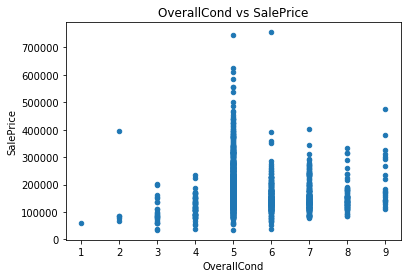

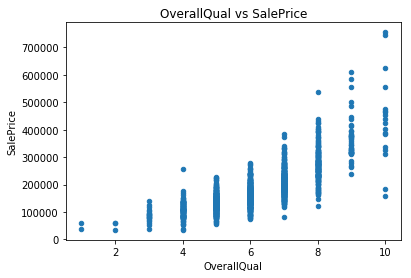

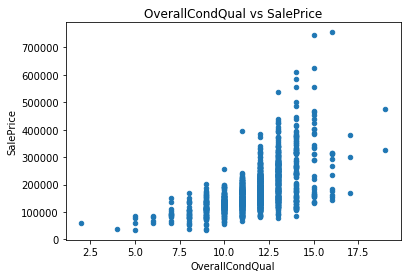

In [379]:
# Add interaction variables between OverallCond and OverallQual
OverallCond_vs_SalePrice = feature_data.plot(kind="scatter", x='OverallCond', y='SalePrice', 
                                    title = "OverallCond vs SalePrice")
OverallQual_vs_SalePrice = feature_data.plot(kind="scatter", x='OverallQual', y='SalePrice', 
                                    title = "OverallQual vs SalePrice")

feature_data['OverallCondQual'] = (feature_data['OverallCond'] * 1)+(feature_data['OverallQual'])

OverallCondQual_vs_SalePrice = feature_data.plot(kind="scatter", x='OverallCondQual', y='SalePrice', 
                                    title = "OverallCondQual vs SalePrice")

In [380]:
feature_data = feature_data.drop(columns = ['OverallCond', 'OverallQual'])

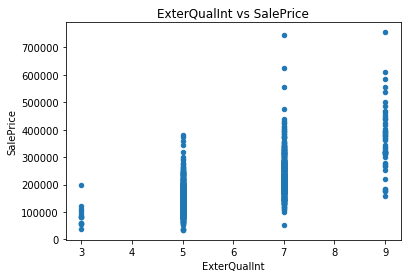

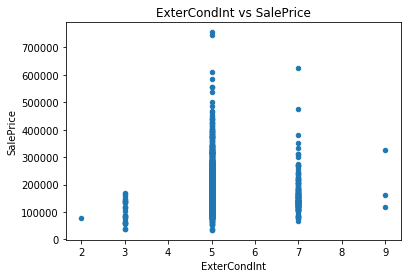

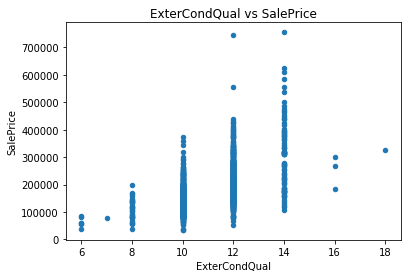

In [381]:
# Add interaction variables for ExterQual and ExterCond
feature_data['ExterQualInt'] =  np.where(feature_data['ExterQual'] == "Ex", 9, 
                                        np.where(feature_data['ExterQual'] == "Gd", 7, 
                                                np.where(feature_data['ExterQual'] == "TA", 5, 
                                                        np.where(feature_data['ExterQual'] == "Fa", 3, 
                                                                np.where(feature_data['ExterQual'] == "Po", 2,0)))))

feature_data['ExterCondInt'] =  np.where(feature_data['ExterCond'] == "Ex", 9, 
                                         np.where(feature_data['ExterCond'] == "Gd", 7, 
                                                np.where(feature_data['ExterCond'] == "TA", 5, 
                                                        np.where(feature_data['ExterCond'] == "Fa", 3, 
                                                                np.where(feature_data['ExterCond'] == "Po", 2,0)))))

ExterQualInt_vs_SalePrice = feature_data.plot(kind="scatter", x='ExterQualInt', y='SalePrice', 
                                    title = "ExterQualInt vs SalePrice")
ExterCondInt_vs_SalePrice = feature_data.plot(kind="scatter", x='ExterCondInt', y='SalePrice', 
                                    title = "ExterCondInt vs SalePrice")

feature_data['ExterCondQual'] = (feature_data['ExterCondInt']*1) + (feature_data['ExterQualInt']*1)
ExterCondQual_vs_SalePrice = feature_data.plot(kind="scatter", x='ExterCondQual', y='SalePrice', 
                                    title = "ExterCondQual vs SalePrice")

# Drop original ExterQual and ExterCond and keep int columns
feature_data = feature_data.drop(columns=['ExterQual', 'ExterCond'])

In [382]:
# Add interaction variables for all categorical basement variables
feature_data['BsmtQualInt'] =  np.where(feature_data['BsmtQual'] == "Ex", 9, 
                                        np.where(feature_data['BsmtQual'] == "Gd", 7, 
                                                np.where(feature_data['BsmtQual'] == "TA", 5, 
                                                        np.where(feature_data['BsmtQual'] == "Fa", 3, 
                                                                np.where(feature_data['BsmtQual'] == "Po", 2,0)))))

feature_data['BsmtCondInt'] =  np.where(feature_data['BsmtCond'] == "Ex", 9, 
                                        np.where(feature_data['BsmtCond'] == "Gd", 7, 
                                                np.where(feature_data['BsmtCond'] == "TA", 5, 
                                                        np.where(feature_data['BsmtCond'] == "Fa", 3, 
                                                                np.where(feature_data['BsmtCond'] == "Po", 2,0)))))

feature_data['BsmtExposureInt'] =  np.where(feature_data['BsmtExposure'] == "Gd", 7, 
                                        np.where(feature_data['BsmtExposure'] == "Av", 5, 
                                                np.where(feature_data['BsmtExposure'] == "Mn", 3, 
                                                        np.where(feature_data['BsmtExposure'] == "No", 1, 0))))

feature_data['BsmtFinType1Int'] =  np.where(feature_data['BsmtFinType1'] == "GLQ", 9, 
                                        np.where(feature_data['BsmtFinType1'] == "ALQ", 7, 
                                                np.where(feature_data['BsmtFinType1'] == "BLQ", 5, 
                                                        np.where(feature_data['BsmtFinType1'] == "Rec", 3, 
                                                                np.where(feature_data['BsmtFinType1'] == "LWQ", 1,
                                                                        np.where(feature_data['BsmtFinType1'] == "Unf",1,0))))))

feature_data['BsmtFinType2Int'] =  np.where(feature_data['BsmtFinType2'] == "GLQ", 9, 
                                        np.where(feature_data['BsmtFinType2'] == "ALQ", 7, 
                                                np.where(feature_data['BsmtFinType2'] == "BLQ", 5, 
                                                        np.where(feature_data['BsmtFinType2'] == "Rec", 3, 
                                                                np.where(feature_data['BsmtFinType2'] == "LWQ", 1,
                                                                        np.where(feature_data['BsmtFinType2'] == "Unf",1,1))))))

feature_data = feature_data.drop(columns = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'])


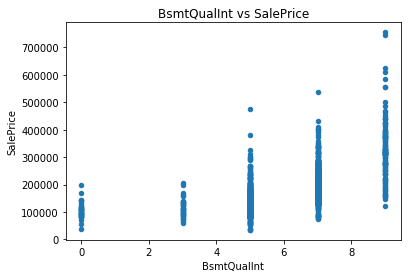

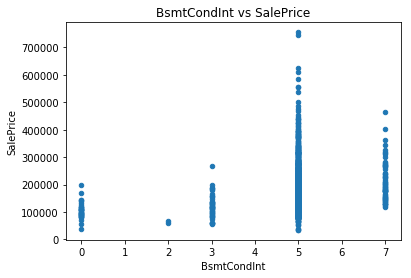

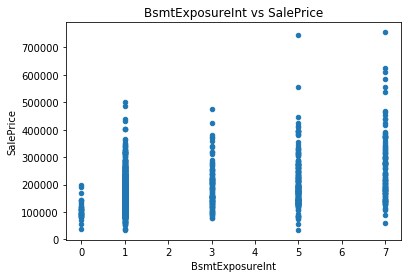

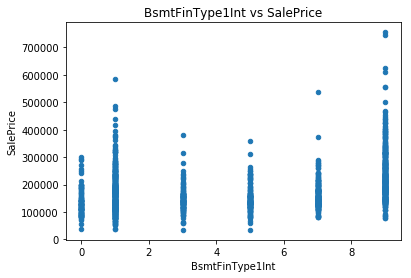

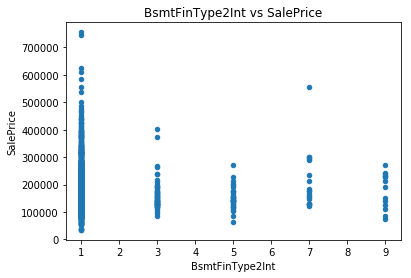

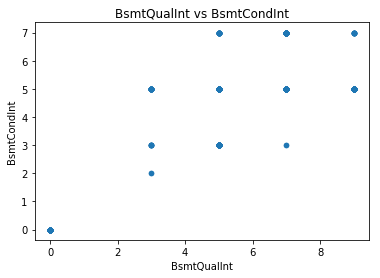

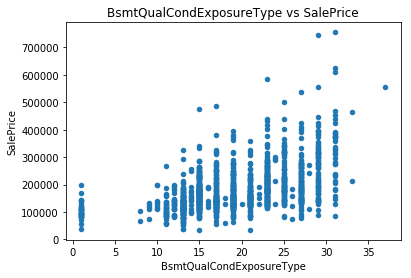

In [360]:
BsmtQualInt_vs_SalePrice = feature_data.plot(kind="scatter", x='BsmtQualInt', y='SalePrice', 
                                    title = "BsmtQualInt vs SalePrice")
BsmtCondInt_vs_SalePrice = feature_data.plot(kind="scatter", x='BsmtCondInt', y='SalePrice', 
                                    title = "BsmtCondInt vs SalePrice")
BsmtExposureInt_vs_SalePrice = feature_data.plot(kind="scatter", x='BsmtExposureInt', y='SalePrice', 
                                    title = "BsmtExposureInt vs SalePrice")
BsmtFinType1Int_vs_SalePrice = feature_data.plot(kind="scatter", x='BsmtFinType1Int', y='SalePrice', 
                                    title = "BsmtFinType1Int vs SalePrice")
BsmtFinType2Int_vs_SalePrice = feature_data.plot(kind="scatter", x='BsmtFinType2Int', y='SalePrice', 
                                    title = "BsmtFinType2Int vs SalePrice")
BsmtQualInt_vs_BsmtCondInt = feature_data.plot(kind="scatter", x='BsmtQualInt', y='BsmtCondInt', 
                                    title = "BsmtQualInt vs BsmtCondInt")

feature_data['BsmtQualCondExposureType'] = feature_data['BsmtFinType2Int'] + feature_data['BsmtFinType1Int'] + feature_data['BsmtExposureInt'] + feature_data['BsmtCondInt'] + feature_data['BsmtQualInt']

BsmtQualCondExposureType_vs_SalePrice = feature_data.plot(kind="scatter", x='BsmtQualCondExposureType', 
                                                            y='SalePrice', 
                                                          title = "BsmtQualCondExposureType vs SalePrice")

In [383]:
# Add interaction variables for GarageQual and GarageCond
feature_data['GarageCondInt'] =  np.where(feature_data['GarageCond'] == "Ex", 9, 
                                        np.where(feature_data['GarageCond'] == "Gd", 7, 
                                                np.where(feature_data['GarageCond'] == "TA", 5, 
                                                        np.where(feature_data['GarageCond'] == "Fa", 3, 
                                                                np.where(feature_data['GarageCond'] == "Po", 2,0)))))

feature_data['GarageQualInt'] =  np.where(feature_data['GarageQual'] == "Ex", 9, 
                                        np.where(feature_data['GarageQual'] == "Gd", 7, 
                                                np.where(feature_data['GarageQual'] == "TA", 5, 
                                                        np.where(feature_data['GarageQual'] == "Fa", 3, 
                                                                np.where(feature_data['GarageQual'] == "Po", 2,0)))))

feature_data['GarageCondQual'] = feature_data['GarageCondInt'] + feature_data['GarageQualInt']

feature_data = feature_data.drop(columns = ['GarageCond', 'GarageQual'])

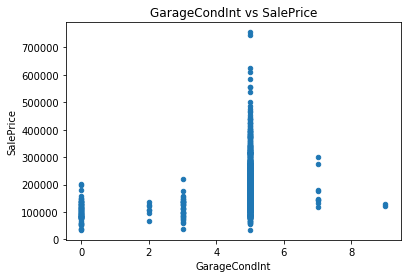

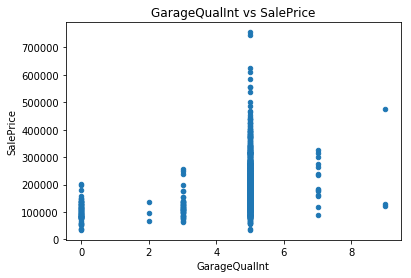

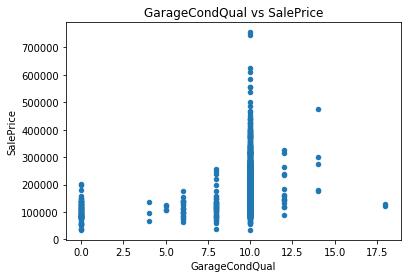

In [384]:
GarageCondInt_vs_SalePrice = feature_data.plot(kind="scatter", x='GarageCondInt', 
                                                            y='SalePrice', 
                                                          title = "GarageCondInt vs SalePrice")

GarageQualInt_vs_SalePrice = feature_data.plot(kind="scatter", x='GarageQualInt', 
                                                            y='SalePrice', 
                                                          title = "GarageQualInt vs SalePrice")

GarageCondQual_vs_SalePrice = feature_data.plot(kind="scatter", x='GarageCondQual', 
                                                            y='SalePrice', 
                                                          title = "GarageCondQual vs SalePrice")

In [385]:
# Add interaction variables for KitchenQual
feature_data['KitchenQualInt'] =  np.where(feature_data['KitchenQual'] == "Ex", 9, 
                                        np.where(feature_data['KitchenQual'] == "Gd", 7, 
                                                np.where(feature_data['KitchenQual'] == "TA", 5, 
                                                        np.where(feature_data['KitchenQual'] == "Fa", 3, 
                                                                np.where(feature_data['KitchenQual'] == "Po", 2,0)))))


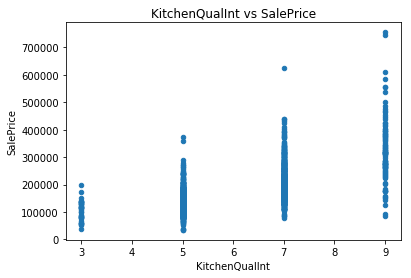

In [386]:
KitchenQualInt_vs_SalePrice = feature_data.plot(kind="scatter", x='KitchenQualInt', 
                                                            y='SalePrice', 
                                                          title = "KitchenQualInt vs SalePrice")

feature_data = feature_data.drop(columns = ['KitchenQual'])

(12, 82)


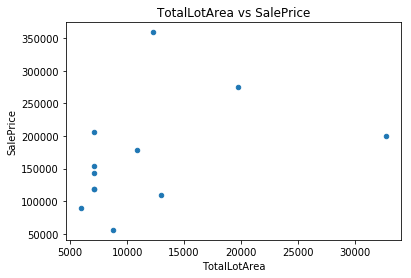

In [387]:
# Look at how the data looks for various sale conditions
subset_feature_data = feature_data[feature_data['SaleCondition'] == "Alloca"]
print(subset_feature_data.shape)
TotalLotArea_vs_SalePrice = subset_feature_data.plot(kind="scatter", x='TotalLotArea', 
                                                            y='SalePrice', 
                                                          title = "TotalLotArea vs SalePrice")

feature_data['IsNotNormal'] = np.where(feature_data['SaleCondition'] == "Normal", 0,1)
feature_data = feature_data.drop(columns = ['SaleCondition'])

# Get dummies for this variable and see what's up later one
# SaleCondition: Condition of sale
#        Normal	Normal Sale (1198)
#        Abnorml	Abnormal Sale -  trade, foreclosure, short sale(101)
#        AdjLand	Adjoining Land Purchase (4)
#        Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	 (12)
#        Family	Sale between family members (20)
#        Partial	Home was not completed when last assessed (associated with New Homes) (125)

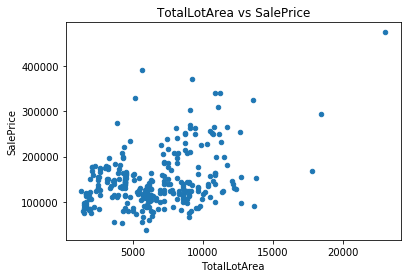

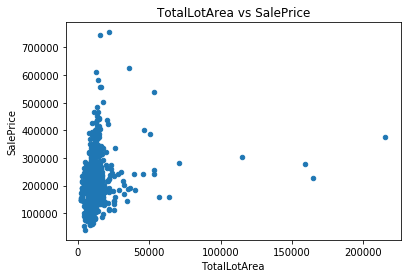

In [388]:
# Look at how the data looks for various MSZones
# subset_feature_data_1 = feature_data[(feature_data['MSZoning'] == "RM") | (feature_data['MSZoning'] == "RH") |
#                                     (feature_data['MSZoning'] == "FV")]
# subset_feature_data_2 = feature_data[(feature_data['MSZoning'] == "RL")]
# subset_feature_data_3 =  feature_data[(feature_data['MSZoning'] == "FV")]

TotalLotArea_vs_SalePrice = subset_feature_data_1.plot(kind="scatter", x='TotalLotArea', 
                                                     y='SalePrice', title = "TotalLotArea vs SalePrice")

TotalLotArea_vs_SalePrice = subset_feature_data_2.plot(kind="scatter", x='TotalLotArea', 
                                                     y='SalePrice', title = "TotalLotArea vs SalePrice")

feature_data['IsRL'] = np.where(feature_data['MSZoning'] == "RL", 1, 0)



feature_data = feature_data.drop(columns = ["MSZoning"])
# MSZoning: Identifies the general zoning classification of the sale.
#        A	Agriculture
#        C	Commercial
#        FV	Floating Village Residential (65)
#        I	Industrial
#        RH	Residential High Density (16)
#        RL	Residential Low Density (1151)
#        RP	Residential Low Density Park 
#        RM	Residential Medium Density (218)

(193, 82)


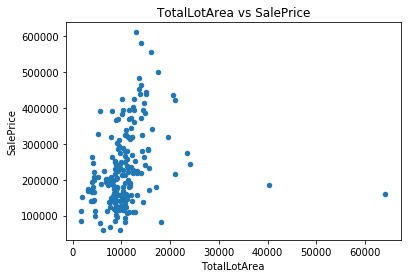

In [389]:
# Look at how the data looks for various SaleType
subset_feature_data_1 = feature_data[(feature_data['SaleType'] != "WD")]
print(subset_feature_data_1.shape)
TotalLotArea_vs_SalePrice = subset_feature_data_1.plot(kind="scatter", x='TotalLotArea', 
                                                     y='SalePrice', title = "TotalLotArea vs SalePrice")

feature_data['IsWD'] = np.where(feature_data['SaleType'] != 'WD', 1, 0)
feature_data = feature_data.drop(columns = ['SaleType'])

# SaleType: Type of sale
		
#        WD 	Warranty Deed - Conventional (1267)
#        CWD	Warranty Deed - Cash (4)
#        VWD	Warranty Deed - VA Loan
#        New	Home just constructed and sold (122)
#        COD	Court Officer Deed/Estate (43)
#        Con	Contract 15% Down payment regular terms (2)
#        ConLw	Contract Low Down payment and low interest (5)
#        ConLI	Contract Low Interest (5)
#        ConLD	Contract Low Down (9)
#        Oth	Other (3)
		

In [390]:
# Take a look at month and year sold
# feature_data.shape
feature_data.columns

Index(['Id', 'MSSubClass', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'Foundation', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice',
       'TotalLotArea', 'MasVnrAreaBin', 'WoodDeckSFBin', 'HaveBsmt',
       'HaveGarage', 'OpenPorchSFBin', 'EnclosedPorchBin', '3SsnPorchBin',
       'ScreenPorchBin', 'PoolAreaBin', 'TotalSF

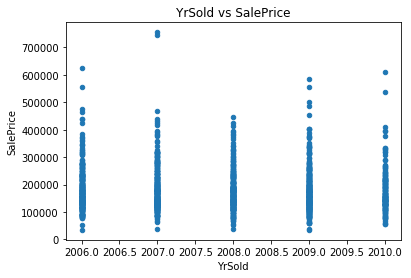

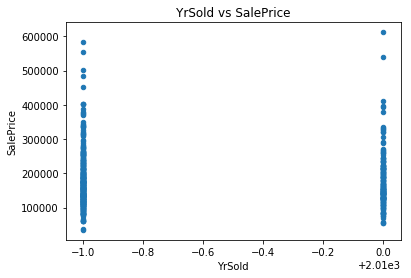

In [391]:
# take a look at the yearsold column!
subset_feature_data_1 =  feature_data[feature_data['YrSold'] > 2000]
subset_feature_data_2 =  feature_data[feature_data['YrSold'] > 2008]
YrSo_vs_SalePrice = subset_feature_data_1.plot(kind="scatter", x='YrSold', 
                                                     y='SalePrice', title = "YrSold vs SalePrice")
YrSo_vs_SalePrice = subset_feature_data_2.plot(kind="scatter", x='YrSold', 
                                                     y='SalePrice', title = "YrSold vs SalePrice")

In [392]:
# Look at the housestyle columns
subset_feature_data_1 =  feature_data[feature_data['HouseStyle'] == '1Story']
subset_feature_data_1.shape

# HouseStyle: Style of dwelling
#        1Story	One story (726)
#        1.5Fin	One and one-half story: 2nd level finished (154)
#        1.5Unf	One and one-half story: 2nd level unfinished (14)
#        2Story	Two story (445)
#        2.5Fin	Two and one-half story: 2nd level finished (8)
#        2.5Unf	Two and one-half story: 2nd level unfinished (11)
#        SFoyer	Split Foyer (37)
#        SLvl	Split Level (65)

(726, 82)

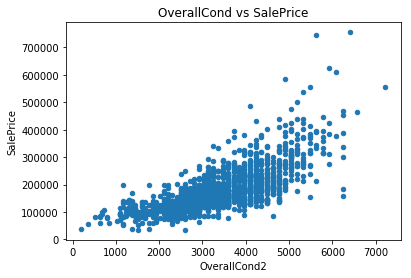

In [408]:
# Sum up all the qual and condition variables
feature_data['OverallCond'] = (feature_data['OverallCondQual'] + 
                              feature_data['ExterCondInt'] + feature_data['ExterQualInt'] + 
                              feature_data['BsmtFinType2Int'] + feature_data['BsmtFinType1Int'] +
                              feature_data['BsmtExposureInt'] + feature_data['BsmtCondInt'] +
                              feature_data['BsmtQualInt'] + feature_data['GarageCondInt'] +
                              feature_data['GarageQualInt'] + feature_data['KitchenQualInt'])
feature_data['OverallCond2'] = (feature_data['OverallCond']**2)

OverallCond_vs_SalePrice = feature_data.plot(kind="scatter", x='OverallCond2', 
                                                     y='SalePrice', title = "OverallCond vs SalePrice")

# Relationship looks quadratic

# Multi-Regression Model with EDA

Other pre-cursors that I have tried
Normalize the data based on range (MinMaxScaler)

Next Steps:
- K-NN
- Deeper dive into individual features which may result in
    - Feature transformation
    - Interaction variables
    - Addition of higher order terms
- Modeling two linear regression models
    - One for lower lotsize houses
